# Trabalho Prático Laboratorial #2

In [1]:
%%javascript
// Disable Autoscrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import Modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import ipywidgets as widgets
import plotly.graph_objects as go

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
data_path = "../data"
forest_path = os.path.join(data_path, "forest-area", "API_AG.LND.FRST.K2_DS2_en_csv_v2_4019655.csv")
surface_path = os.path.join(data_path, "surface-area", "API_AG.SRF.TOTL.K2_DS2_en_csv_v2_4023648.csv")
numberOfFires_path = os.path.join(data_path, "fires", "eudb-nf.csv")

header_rows = [0, 2]

### 1. Qual variação da área florestal de cada país ao longo do tempo?

In [ ]:
# Read Datasets
forest_data = pd.read_csv(forest_path, skiprows=header_rows)

# Removes row if all values are NaN
forest_data = forest_data.dropna(axis=0, how='all')

# Removes column if all values are NaN
forest_data = forest_data.dropna(axis=1, how='all')

In [ ]:
forest_data.head()

In [ ]:
columns = forest_data.columns.values.astype('U')
id_columns = columns[np.invert(np.char.isdigit(columns))]
value_columns = columns[np.char.isdigit(columns)]
data = pd.melt(forest_data, id_vars=id_columns, value_vars=value_columns, var_name='Year', value_name='Forest Area')

In [ ]:
data.head()

In [ ]:
data['Year'] = data['Year'].astype('int')
data.dtypes

In [ ]:
countries = data['Country Code'].unique()
id_countries = np.arange(len(countries))
country_code = dict(zip(countries, id_countries))
data2 = data.replace({'Country Code': country_code})
data2.head()

In [ ]:
data2.dtypes

In [ ]:
#line plot
#plt.rcParams['figure.figsize'] = [20, 10]
#sns.lineplot(data=data, x='Year', y= 'Forest Area', hue='Country Name')
#bar plot
#ver perdas e ganhos
#top 10 bot 10
#percentagem


In [ ]:
from sklearn.cluster import OPTICS


d = data2[['Country Code', 'Year', 'Forest Area']]
d = d.dropna()
d = d.to_numpy()
clustering = OPTICS().fit(d)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d[:,0], d[:,1], d[:,2], c=d[:,0], cmap='viridis', linewidth=0.5)

In [ ]:
#area de pais x no ano 2020 - area de pais x no ano 1990
#criar dataset com country code (sem repetidos) e variacao
#scatter plot da variacao?
#os q tem mais variaçao fazer barplot so desse pais ao longo dos anos
#fazer por percentagem é a pergunta de baixo <-----

for dataset in data:
    data.loc[data['Year'] <= '2000', 'Status'] = 0
    data.loc[data['Year'] >= '2010', 'Status'] = 1
    data.loc[data['Year'] >= '2020', 'Status'] = 2

    
 
for dataset in data:
    data.loc[data['Year'] <= '2000', 'StatusLabel'] = '<= 2000'
    data.loc[data['Year'] >= '2010', 'StatusLabel'] = '>= 2010'
    data.loc[data['Year'] >= '2020', 'StatusLabel'] = '>= 2020'


In [ ]:
data

In [ ]:
#scatterplot
data.head()
plt.rcParams['figure.figsize'] = [20, 10]
fig=sns.scatterplot(data=data, x='Year', y= 'Forest Area', hue='Country Name')
plt.show()

In [ ]:
df1, df2 = data.loc[data['Status'] == 0 ] , data.loc[data['Status'] == 1 ]

In [ ]:
df1

In [ ]:
#barplot

data.head()
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='Country Code', y= 'Forest Area', data=df1, hue='Year')

Dizer quais os 10 paises com maior perda, 10 paises com maior ganho, paises que nao alterou nada ao longo dos anos

### 2. Qual o rácio entre a área florestal e a área total de cada país?
#### Questões:
1. Quais os países que têm maior rácio?
2. Quais os países que têm menor rácio?
3. Quais os países que apresentam maior variação no seu rácio? Porquê?

In [5]:
# Read Datasets
forest_data = pd.read_csv(forest_path, skiprows=header_rows)
surface_data = pd.read_csv(surface_path, skiprows=header_rows)

In [6]:
# Removes row if all values are NaN
forest_data.dropna(axis=0, how='all', inplace=True)
surface_data.dropna(axis=0, how='all', inplace=True)

# Removes column if all values are NaN
forest_data.dropna(axis=1, how='all', inplace=True)
surface_data.dropna(axis=1, how='all', inplace=True)

In [7]:
# Visualize dataframe structure
forest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,4.2,4.200,4.200,4.200,4.200,4.20,...,4.20,4.20,4.20,4.20,4.2,4.200000e+00,4.2,4.20,4.2,4.2
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,4988232.4,4968316.114,4947640.628,4911134.742,4890838.856,4870542.97,...,4765400.98,4734211.36,4703021.74,4671832.12,4640642.5,4.607876e+06,4575901.2,4544314.78,4511676.2,4479395.0
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,12084.4,12084.400,12084.400,12084.400,12084.400,12084.40,...,12084.40,12084.40,12084.40,12084.40,12084.4,1.208440e+04,12084.4,12084.40,12084.4,12084.4
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,2060349.0,2049660.284,2038971.568,2028282.852,2017594.136,2006905.42,...,1862169.28,1854212.96,1846256.64,1838300.32,1830344.0,1.822961e+06,1815608.1,1807898.60,1800220.1,1792580.7
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,792627.8,791073.630,789519.460,787965.290,786411.120,784856.95,...,716029.38,710478.76,704928.14,699377.52,693826.9,6.882762e+05,682725.7,677175.10,671624.4,666073.8


In [8]:
# Visualize dataframe structure
surface_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Surface area (sq. km),AG.SRF.TOTL.K2,180.0,180.0,180.0,180.0,180.0,180.0,...,1.800000e+02,1.800000e+02,180.00,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,180.00,1.800000e+02
1,Africa Eastern and Southern,AFE,Surface area (sq. km),AG.SRF.TOTL.K2,12718531.0,12718531.0,12718531.0,12718531.0,12718531.0,12718531.0,...,1.263289e+07,1.263290e+07,15121164.46,1.512116e+07,1.512116e+07,1.512116e+07,1.512116e+07,1.512116e+07,15121155.64,1.512116e+07
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,652860.0,652860.0,652860.0,652860.0,652860.0,652860.0,...,6.528600e+05,6.528600e+05,652860.00,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,652860.00,6.528600e+05
3,Africa Western and Central,AFW,Surface area (sq. km),AG.SRF.TOTL.K2,9166270.0,9166270.0,9166270.0,9166270.0,9166270.0,9166270.0,...,9.166270e+06,9.166270e+06,9166270.00,9.166270e+06,9.166270e+06,9.166270e+06,9.166270e+06,9.166270e+06,9166270.00,9.166270e+06
4,Angola,AGO,Surface area (sq. km),AG.SRF.TOTL.K2,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,...,1.246700e+06,1.246700e+06,1246700.00,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1246700.00,1.246700e+06


In [9]:
# Descriptive Statistics
forest_data.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,...,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.610000e+02,2.610000e+02,2.570000e+02,2.570000e+02
mean,1.716940e+06,1.714981e+06,1.711027e+06,1.706319e+06,1.702496e+06,1.698673e+06,1.694851e+06,1.691028e+06,1.687205e+06,1.683383e+06,...,1.639866e+06,1.637200e+06,1.634535e+06,1.631870e+06,1.629205e+06,1.627007e+06,1.476944e+06,1.474458e+06,1.494767e+06,1.492194e+06
std,5.161549e+06,5.154155e+06,5.142815e+06,5.130501e+06,5.119503e+06,5.108515e+06,5.097539e+06,5.086574e+06,5.075620e+06,5.064677e+06,...,4.962221e+06,4.956107e+06,4.950007e+06,4.943920e+06,4.937848e+06,4.933129e+06,4.323285e+06,4.318040e+06,4.342049e+06,4.336621e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.239975e+03,3.376367e+03,3.436115e+03,3.504298e+03,3.542130e+03,3.579963e+03,3.604395e+03,3.600690e+03,3.596985e+03,3.593280e+03,...,3.382140e+03,3.366980e+03,3.351820e+03,3.336660e+03,3.321500e+03,3.306325e+03,3.291000e+03,3.237000e+03,3.685700e+03,3.695000e+03
50%,3.538585e+04,3.658068e+04,3.640565e+04,3.623062e+04,3.609940e+04,3.628148e+04,3.646355e+04,3.664562e+04,3.682770e+04,3.700977e+04,...,3.646397e+04,3.623324e+04,3.593452e+04,3.527616e+04,3.535905e+04,3.563085e+04,3.562600e+04,3.551000e+04,3.611090e+04,3.611090e+04
75%,2.767877e+05,2.764545e+05,2.761212e+05,2.757879e+05,2.754547e+05,2.751214e+05,2.747882e+05,2.744549e+05,2.741216e+05,2.737884e+05,...,2.728120e+05,2.726615e+05,2.725110e+05,2.723605e+05,2.722100e+05,2.722000e+05,2.493500e+05,2.493500e+05,2.798000e+05,2.798000e+05
max,4.128269e+07,4.121003e+07,4.113736e+07,4.106469e+07,4.099203e+07,4.091936e+07,4.084669e+07,4.077402e+07,4.070136e+07,4.062869e+07,...,4.012364e+07,4.009056e+07,4.005748e+07,4.002440e+07,3.999132e+07,3.995825e+07,3.066349e+07,3.061417e+07,3.056222e+07,3.051179e+07


In [10]:
# Descriptive Statistics
surface_data.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,...,2.630000e+02,2.630000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.640000e+02
mean,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,5.313340e+06,...,5.211450e+06,5.211454e+06,5.317571e+06,5.318693e+06,5.324044e+06,5.324179e+06,5.324288e+06,5.324315e+06,5.324460e+06,5.344140e+06
std,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,1.539313e+07,...,1.526285e+07,1.526285e+07,1.549852e+07,1.550130e+07,1.551507e+07,1.551545e+07,1.551579e+07,1.551587e+07,1.551633e+07,1.554088e+07
min,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
25%,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,2.302750e+04,...,1.942500e+04,1.942500e+04,2.027000e+04,2.027000e+04,2.067500e+04,2.067500e+04,2.067500e+04,2.067500e+04,2.048000e+04,2.090000e+04
50%,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,2.112850e+05,...,1.967100e+05,1.967100e+05,1.999490e+05,1.999490e+05,1.999490e+05,1.999490e+05,1.999490e+05,1.999500e+05,1.999500e+05,2.037750e+05
75%,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,1.261925e+06,...,1.243445e+06,1.243445e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.251775e+06
max,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,1.316353e+08,...,1.317846e+08,1.317848e+08,1.342731e+08,1.343020e+08,1.345433e+08,1.345462e+08,1.345489e+08,1.345497e+08,1.345532e+08,1.345427e+08


In [11]:
# Displays Columns Names
forest_data.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [12]:
# Displays Columns Names
surface_data.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'], dtype=object)

In [13]:
# Keeps columns common to both dataframes
drop_columns = ['Indicator Name', 'Indicator Code']
surface = surface_data.drop(columns=[col for col in surface_data if (col not in forest_data.columns.values) or (col in drop_columns)])
forest = forest_data.drop(columns=[col for col in forest_data if (col not in surface_data.columns.values) or (col in drop_columns)])

In [14]:
# Unpivot dataframe from wide to long format
columns = surface.columns.values.astype('U')
id_columns = columns[np.invert(np.char.isdigit(columns))]
value_columns = columns[np.char.isdigit(columns)]
surface2 = pd.melt(surface, id_vars=id_columns, value_vars=value_columns, var_name='Year', value_name='Surface Area')

In [15]:
# Unpivot dataframe from wide to long format
columns = forest.columns.values.astype('U')
id_columns = columns[np.invert(np.char.isdigit(columns))]
value_columns = columns[np.char.isdigit(columns)]
forest2 = pd.melt(forest, id_vars=id_columns, value_vars=value_columns, var_name='Year', value_name='Forest Area')

In [16]:
# Replace 'Country Code' by integers
countries = forest['Country Code'].unique()
id_countries = np.arange(len(countries))
country_code = dict(zip(countries, id_countries))
forest2.replace({'Country Code': country_code}, inplace=True)
surface2.replace({'Country Code': country_code}, inplace=True)

In [17]:
# Perform an Inner Join On 'Country Name', 'Country Code' and 'Year' columns
cols = ['Country Name', 'Country Code', 'Year']
data = forest2.merge(surface2, how='inner', on=cols)

In [18]:
# Drop NaNs
data.dropna(inplace=True)

In [19]:
# Visualize dataframe structure
data.head()

,Country Name,Country Code,Year,Forest Area,Surface Area
0,Aruba,0,1990,4.2,180.0
1,Africa Eastern and Southern,1,1990,4988232.4,12718531.0
2,Afghanistan,2,1990,12084.4,652860.0
3,Africa Western and Central,3,1990,2060349.0,9166270.0
4,Angola,4,1990,792627.8,1246700.0


In [20]:
# Group dataframe by 'Country Name', 'Country Code' and 'Year'
grouped = data.groupby(cols)

In [21]:
# Calculates Forest Area Ratio for all groups
data2 = grouped.apply(lambda x: x.assign(Ratio=x['Forest Area'] / x['Surface Area']))

In [22]:
# Visualize dataframe structure
data2.head()

,Country Name,Country Code,Year,Forest Area,Surface Area,Ratio
0,Aruba,0,1990,4.2,180.0,0.023333
1,Africa Eastern and Southern,1,1990,4988232.4,12718531.0,0.392202
2,Afghanistan,2,1990,12084.4,652860.0,0.018510
3,Africa Western and Central,3,1990,2060349.0,9166270.0,0.224775
4,Angola,4,1990,792627.8,1246700.0,0.635781


In [23]:
# Interactive lineplot
options = data2['Country Name'].unique()

dropdown = widgets.Dropdown(
    options=options,
    value=options[0],
    description='Country Name',
    disabled=False,
)

def update(country):
    sns.lineplot(data=data2[data2['Country Name'] == country], x='Year', y='Ratio', hue='Country Code', palette='viridis')

out = widgets.interactive(update, country=dropdown)

display(out)

interactive(children=(Dropdown(description='Country Name', options=('Aruba', 'Africa Eastern and Southern', 'A…

In [24]:
# Interactive lineplot with checkboxes
options = data2['Country Name'].unique()
checkboxes = list()
menu = list()
n_cols = 3

for option in options:
    checkbox = widgets.Checkbox(
        value=False,
        description=option,
        disabled=False,
        indent=False
    )
    checkboxes.append(checkbox)

for col in range(n_cols):
    vertical_box = widgets.VBox([checkboxes[i] for i in range(col, len(checkboxes), n_cols)])
    menu.append(vertical_box)

ui = widgets.HBox(menu)

def select(**kwargs):
    selected = []
    for key in kwargs:
        if kwargs[key] is True:
            selected.append(key)
    sns.lineplot(data=data2[data2['Country Name'].isin(selected)], x='Year', y='Ratio', hue='Country Name', palette='viridis')

arg_dict = {checkbox.description: checkbox for checkbox in checkboxes}
out = widgets.interactive_output(select, arg_dict)
display(ui, out)

Output()

In [27]:
# Interactive barplot
options = data2['Year'].unique()

dropdown = widgets.Dropdown(
    options=options,
    value=options[-1],
    description='Year',
    disabled=False,
)

def update2(year):
    sns.barplot(data=data2[data2['Year'] == year].sort_values(by=['Ratio']), x='Country Name', y='Ratio', palette='viridis')

out = widgets.interactive(update2, year=dropdown)

display(out)

interactive(children=(Dropdown(description='Year', index=28, options=('1990', '1991', '1992', '1993', '1994', …

In [38]:
# Interactive lineplot with checkboxes
years = data2['Year'].unique()

years_dropdown = widgets.Dropdown(
    options=years,
    value=years[-1],
    description='Year',
    disabled=False,
)

opts = data2['Country Name'].unique()
checkboxes = list()
menu = list()
n_cols = 3

for opt in opts:
    checkbox = widgets.Checkbox(
        value=False,
        description=opt,
        disabled=False,
        indent=False
    )
    checkboxes.append(checkbox)

for col in range(n_cols):
    vertical_box = widgets.VBox([checkboxes[i] for i in range(col, len(checkboxes), n_cols)])
    menu.append(vertical_box)

ui = widgets.HBox(menu)

def select(year, **kwargs):
    selected = []
    for key in kwargs:
        if kwargs[key] is True:
            selected.append(key)
    try:
        sns.barplot(data=data2[(data2['Year'] == year) & (data2['Country Name'].isin(selected))].sort_values(by=['Ratio']), x='Country Name', y='Ratio', palette='viridis')
    except ValueError:
        pass
    
args = {'year' : years_dropdown}
args.update({checkbox.description: checkbox for checkbox in checkboxes})
out = widgets.interactive_output(select, args)
display(ui, out)

Output()

In [ ]:
# TODO Calcular os países com maior variação no seu rácio de área florestal e perceber o porquê dessa variação

In [ ]:
# TODO Fazer Histogramas para perceber a distribuição dos Rácios por Ano?

In [ ]:
# TODO Calcular a média e/ou mediana por país?

In [ ]:
# TODO Perceber a evolução do rácio global ao longo do tempo?

In [ ]:
# TODO Perceber que gráficos usar aqui

### 3. Como se comparam os vários países do mundo a nível de incêndios? - Cláudia

In [43]:
# Read Dataset
fires_data = pd.read_csv(numberOfFires_path)

# Removes row if all values are NaN
fires_data.dropna(axis=0, how='all', inplace=True)

# Removes column if all values are NaN
fires_data.dropna(axis=1, how='all', inplace=True)

In [44]:
# Visualize dataframe structure
fires_data.head()

,Number of fires,Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
0,1980,2349,7190,5040,11963,1207,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN
1,1981,6730,10878,5173,14503,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN
2,1982,3626,6545,5308,9557,1045,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN
3,1983,4539,4791,4659,7956,968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN
4,1984,7356,7203,5672,8482,1284,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183,NaN


In [45]:
# Rename column from 'Number of fires' to 'Year'
fires_data.rename(columns = {'Number of fires' : 'Year'}, inplace = True)

In [46]:
# Unpivot dataframe from wide to long format
cols = fires_data.columns.values.astype('U')
ids = cols[0]
values = cols[1:]
data = pd.melt(fires_data, id_vars=ids, value_vars=values, var_name='Country', value_name='Number of Fires')

In [49]:
# Visualize dataframe structure
data.head()

,Year,Country,Number of Fires
0,1980,Portugal,2349.0
1,1981,Portugal,6730.0
2,1982,Portugal,3626.0
3,1983,Portugal,4539.0
4,1984,Portugal,7356.0


In [51]:
# Drop NaNs
data.dropna(inplace=True)

In [55]:
# Interactive Barplot
options = data['Year'].unique()

dropdown = widgets.Dropdown(
    options=options,
    value=options[-1],
    description='Year',
    disabled=False,
)

def update(year):
    sns.barplot(data=data[data['Year'] == year].sort_values(by=['Number of Fires']), x='Country', y='Number of Fires', palette='viridis')

out = widgets.interactive(update, year=dropdown)

display(out)

interactive(children=(Dropdown(description='Year', index=36, options=(1980, 1981, 1982, 1983, 1984, 1985, 1986…

In [56]:
# Interactive Lineplot
options = data['Country'].unique()

dropdown = widgets.Dropdown(
    options=options,
    value=options[0],
    description='Country',
    disabled=False,
)

def update(country):
    sns.lineplot(data=data[data['Country'] == country], x='Year', y='Number of Fires', palette='viridis')

out = widgets.interactive(update, country=dropdown)

display(out)

interactive(children=(Dropdown(description='Country', options=('Portugal', 'Spain', 'France', 'Italy', 'Greece…

<AxesSubplot:xlabel='Year', ylabel='Number of Fires'>

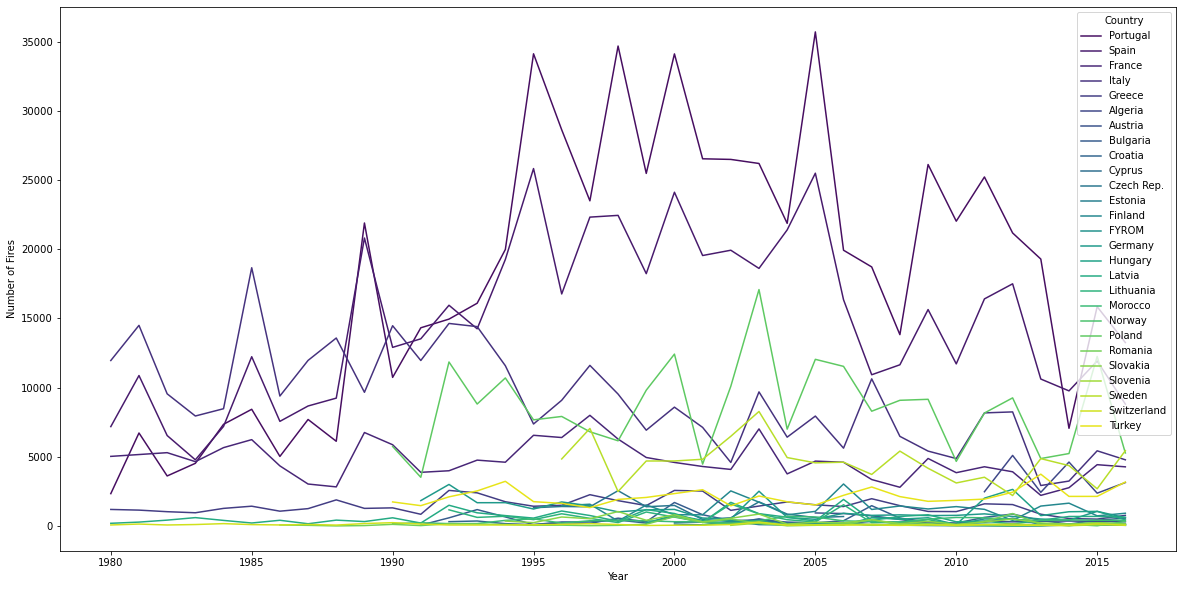

In [58]:
# Lineplot
sns.lineplot(data=data, x='Year', y='Number of Fires', hue='Country', palette='viridis')

### 4. Como se compara perda de floresta ao longo dos anos em cada país com os incêndios que ocorreram em cada um desses anos? - Bea

In [ ]:
#bea
# Read Datasets
fires_data = pd.read_csv(numberOfFires_path)

# Removes row if all values are NaN
fires_data = fires_data.dropna(axis=0, how='all')

# Removes column if all values are NaN
fires_data = fires_data.dropna(axis=1, how='all')
#substituir nan por 0 para dar para fazer o plot?
fires_data = fires_data.fillna(0)

# merge do dataset incendios com area florestal (para nao contar com anos e paises q nao estejam nos 2 datasets)
# plot de media de numero de incendios por pais?
    #ver quais os paises com mais incendios, quais os commenos incendios, coincide com pergunta 1 ou 2?
# mapa correlacao
#


In [ ]:
fires_data

In [ ]:
#criar coluna country com os paises e coluna number of fires com o numero dos fogos
columns = fires_data.columns.values.astype('U')
id_columns = columns[0]
value_columns = columns[1:]
data = pd.melt(fires_data, id_vars=id_columns, value_vars=value_columns, var_name='Country', value_name='Number of Fires')

In [ ]:
data


### 5. Como varia a área florestal ao longo dos anos com as atividades económicas (agricultura e mineração) de cada país? - Bea

In [ ]:
#bea
#variacao atividades economicas
    #paises com mais variacao, menos variacao
#comparar com conclusao da pergunta 1

### 6. Como se relacionam os diferentes tipos de floresta com a área florestal ardida? - Cláudia

In [ ]:
# Load Datasets

In [ ]:
# Join

### 7. Como se relaciona a densidade populacional com a área florestal em cada país ao longo do tempo? - Cláudia

### 8. Como se relaciona o PIB per capita com a desflorestação em cada país ao longo do tempo? - Bea

In [ ]:
#bea
#grafico variacao do pib
# merge dos datasets e correlacao


### 9. Como se relaciona a temperatura, precipitação, humidade, vento de cada país com os incêndios ocorridos por ano? - Anyone

In [ ]:
#correlacao

## Fim